In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('aug_train.csv')
var_df = pd.read_csv('var_df.csv')

## 1 ) Data Visualization

##### 1-1) Continual Variables

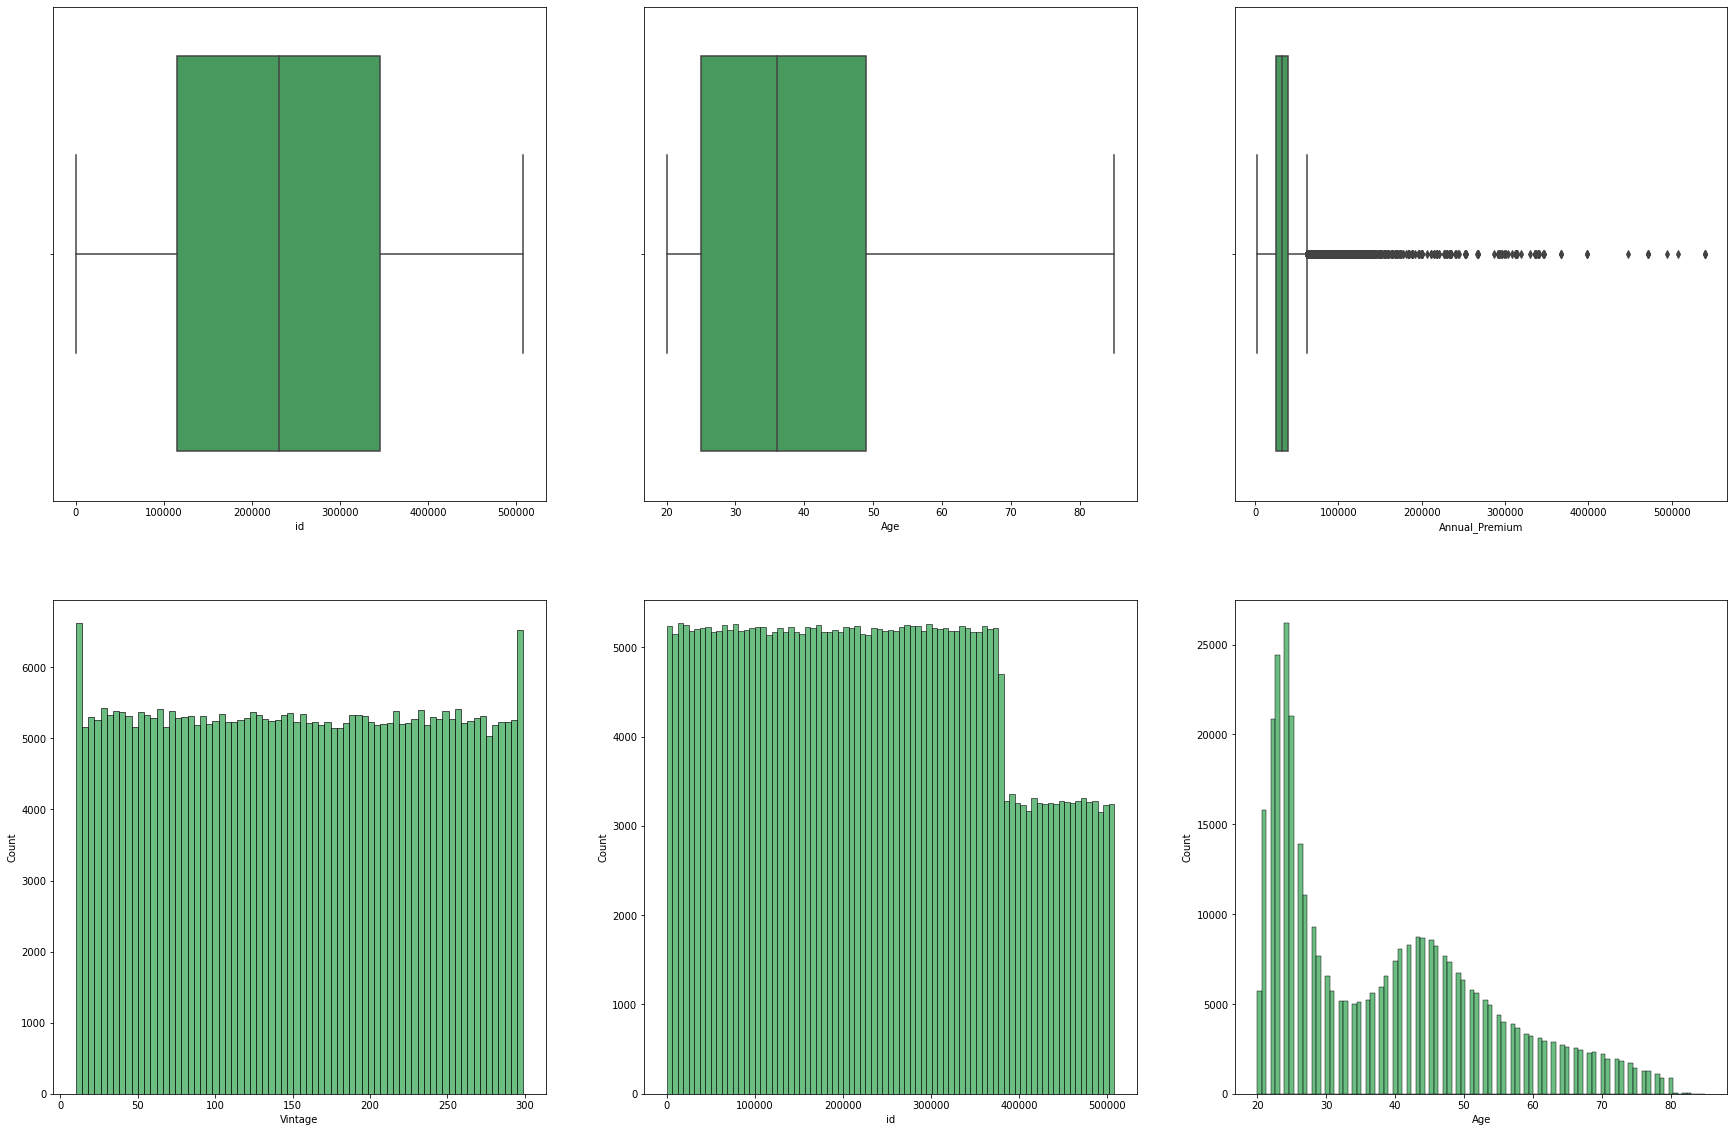

In [48]:
#continuous variable -> catagorical variable
columns_ = ['Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel']
for col in columns_:
    df[col] = df[col].astype('object')

cols = []
# Extract continuous variables
for col in df.columns:
    if df[col].dtypes == 'int' or df[col].dtypes == 'float':
        cols.append(col)
cols.remove('Response') #only see the X variable
cols = cols * 2 # to draw two types of graphs

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (30,20))
sns.set_palette('RdYlGn_r')

i = 1
for col in cols:
    if 1 <= i <=3:
        plt.subplot(2,3,i)
        sns.boxplot(df[col])
        i += 1
    elif 4 <= i <=6:
        plt.subplot(2,3,i)
        sns.histplot(df[col])
        i += 1

### 1-2) Discrete Variables

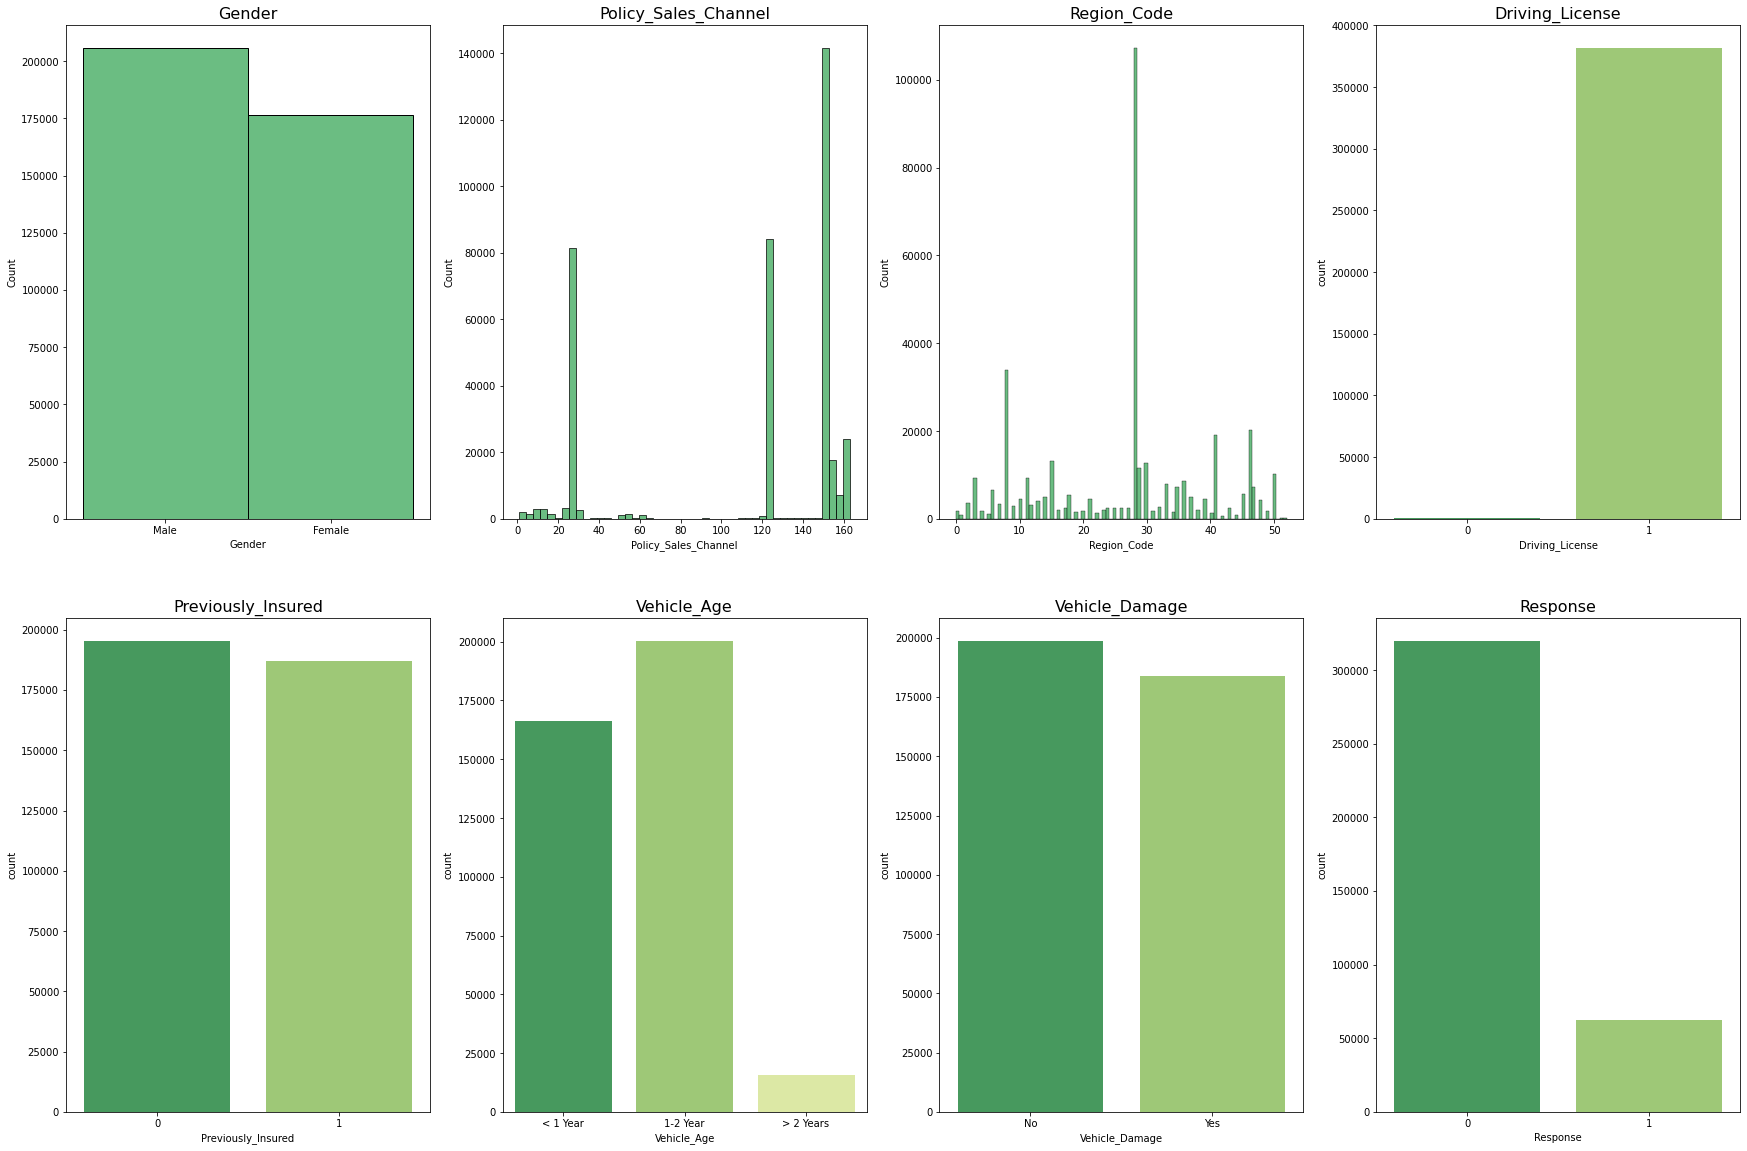

In [49]:
_dict = {"H" : ["Gender", "Policy_Sales_Channel", "Region_Code"],
        "C" : ["Driving_License", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage", "Response"]}

def make_plots(data, variable):
    if variable in _dict["H"]:
        sns.histplot(data[variable])
    else:
        sns.countplot(data[variable])

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 20))

i = 1
var_lst = _dict["H"] + _dict["C"]
for var in var_lst:
    plt.subplot(2, 4, i)
    make_plots(df, var)
    plt.title(var, fontsize = 16)
    i += 1

## 2 ) Visualize Relationship between Variables

### 2-1) Correlation

<AxesSubplot:>

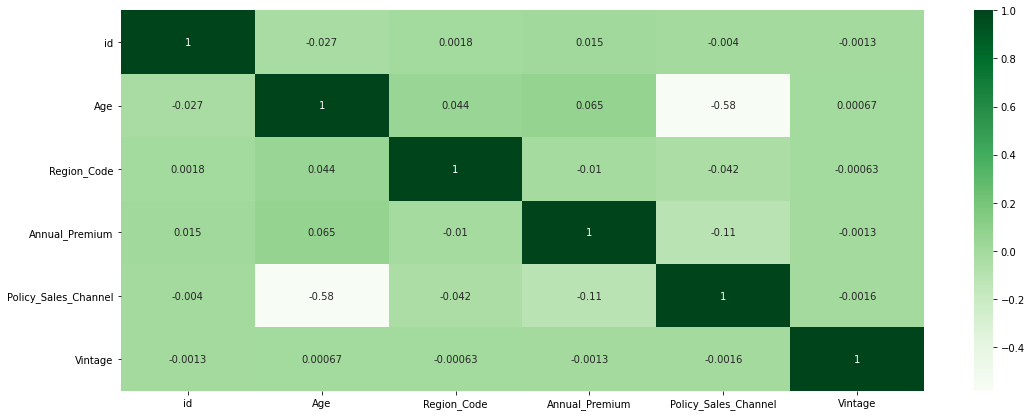

In [33]:
#Extract variable which we want to analyize correlation
ndf = df.loc[:,['id','Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']]

#Heatmap for variables which are included in ndf
plt.figure(figsize = (18, 7))
sns.heatmap(ndf.corr(), cmap = 'Greens', annot = True)

### 2-2) Relationship between Variables

#### Vehicle Age - Vehicle Damage

   - If time that customer uses its own car gets longer the possibility for getting car damage goes higher
   
   - However if it goes for ">2 Years" the case of car damage dramatically get lows
        
        - It seems that there is absolute low number of case who use longer than 2 years

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

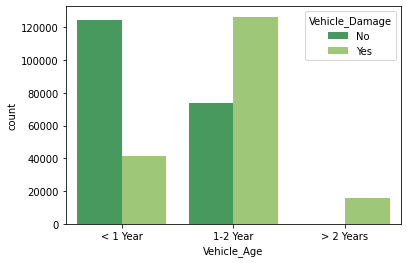

In [34]:
#Set Option
sns.set_palette('RdYlGn_r')

#Countplot for "Vehicle_Age" and it is partitioned via "Vehicle Damage"
sns.countplot(df['Vehicle_Age'], hue = df['Vehicle_Damage'])

#### Previously Insured - Vehicle Damage

- If customer has been Insured before the possibility for getting car damage goes lower
- We may think this case as the one who uses insurance services may drive more carefully
    - It is great information for Insurance company

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

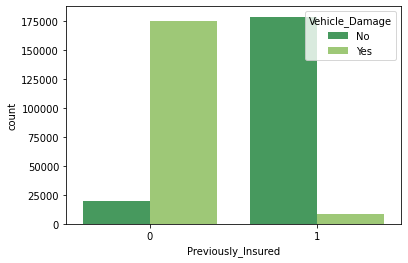

In [35]:
#Set Options
sns.set_palette('RdYlGn_r')

#Countplot for "Previously_Insured" and it is partitioned via "Vehicle Damage"
sns.countplot(df['Previously_Insured'], hue = df['Vehicle_Damage'])

### 2-3) Relationship between Target variable

#### Vehicle Age - Response
- When Vehicle Age goes higher customer has tendency to make negative response for car insurance
    - Except when it goes longer than 2 Years

<AxesSubplot:xlabel='Vehicle_Age'>

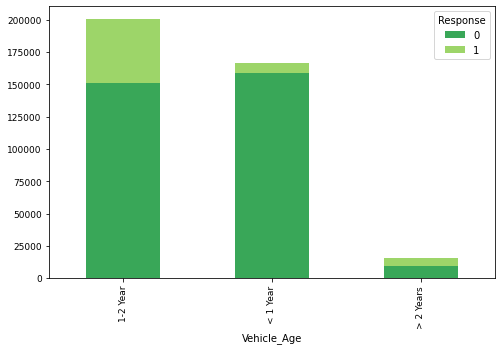

In [36]:
#Group data by "Vehicle_Age", "Response" to see the relationship between vehicle age and reponse which is the target variable
gb = df.groupby(['Vehicle_Age', 'Response']).size().unstack()

#Plot for gouped data(Vehicle Age / Response)
gb.plot(kind='bar', stacked=True, figsize = [8,5], fontsize = 9)

#### Previously Insured - Response
- Contrast to our expectation, customer who has been already insured has tendency to make negative response for car insurance
    - we may guess the experience that being helped from insurance make customer to get positive response

<AxesSubplot:xlabel='Previously_Insured'>

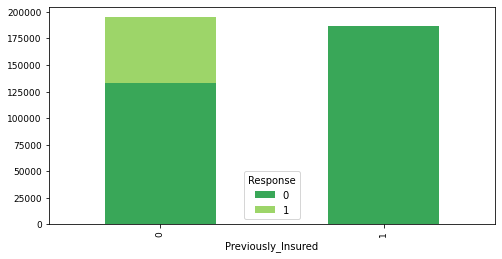

In [37]:
#Group data by "Previously_Insured", "Response" to see the relationship between vehicle age and reponse which is the target variable
gb = df.groupby(['Previously_Insured', 'Response']).size().unstack()

#Plot for gouped data(Previously_Insured / Response)
gb.plot(kind = 'bar', stacked = True, figsize = [8,4], fontsize = 9)

<AxesSubplot:xlabel='Age', ylabel='Count'>

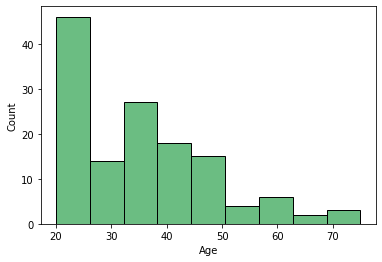

In [38]:
#Since there are extremely low number of case who is negative for car insurance, we make Histogram of the data which is sorted by customer's age
sns.histplot(df[(df['Previously_Insured'] == 1) & (df['Response'] == 1)]['Age'])

## 3 ) Adding new Variables(By Graph Analyizing)

### 1. Population
   - Region code 28 is the majority class in our data, so we may guess the populariy density exists on region code 28, which we call "Main" ("minor" for other city)

<AxesSubplot:xlabel='Region_Code', ylabel='Count'>

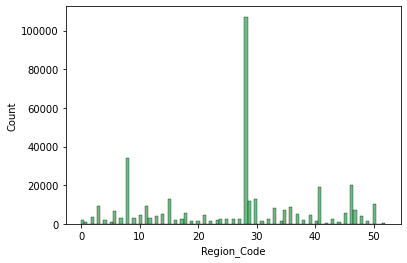

In [39]:
sns.histplot(df['Region_Code'])

### 2. Basic_Annual
 - Similar as Region Code, the Annual Preimum is centered on "2630".
 - We interpret this case as 2630 is the basic fee of car insurance which has no other option

<AxesSubplot:xlabel='Annual_Premium', ylabel='Count'>

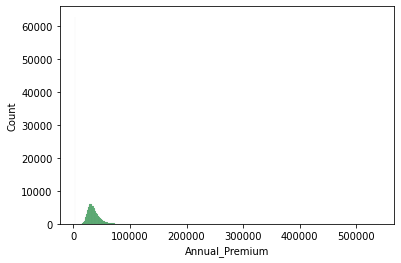

In [40]:
sns.histplot(df['Annual_Premium'])

### 3. Beneficiary , 5. N_Danger
- When customer has been insured and get car damage, we guess they might get positive response for car insurance, so we make 3rd variable which we call "Beneficiary"
- When customer doesn't have been insured and get car damage, we also guess they might get positive response for car insurance, so we make 5th variable which we call N_Danger

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

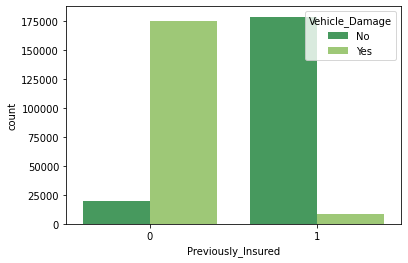

In [41]:
sns.set_palette('RdYlGn_r')
sns.countplot(df['Previously_Insured'], hue = df['Vehicle_Damage'])

### 4. Danger
- When the vehicle age is lower than average, and when if they have been car accident, we may guess that customers have dangerous driving skills, so we make 4th variables which we call Danger

<AxesSubplot:xlabel='Vehicle_Age'>

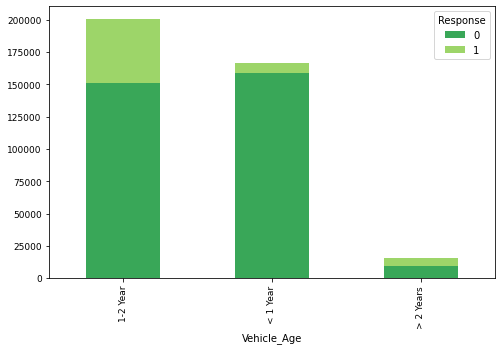

In [42]:
gb = df.groupby(['Vehicle_Age', 'Response']).size().unstack()
gb.plot(kind='bar', stacked=True, figsize = [8,5], fontsize = 9)

### 6. Age_Damaged
- We calculate the proportion of car damaged in age group and make 6th variable which we call Age_Damaged

<AxesSubplot:xlabel='Age_group'>

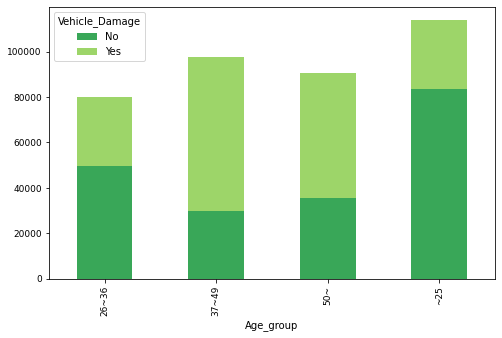

In [43]:
gb = var_df.groupby(['Age_group', 'Vehicle_Damage']).size().unstack()
gb.plot(kind='bar', stacked=True, figsize = [8,5], fontsize = 9)

### 7. Main_Channel
- Channel means the way customer get contract with insurance
- The 152 / 26 / 124 Channel have the majority customers, so we grouped as "Main" channel and make 7th variable which we call Main_Channel

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Count'>

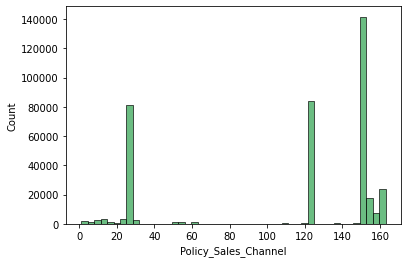

In [44]:
sns.histplot(df['Policy_Sales_Channel'])

### 8. Age_Channel
- Even though there are majority channel, if we divide customer by their age the tendency has been changed, so we make 8th variable which we call age_channel

In [45]:
df_y = df[df['Age']<36]
df_o = df[df['Age']>=37]

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Count'>

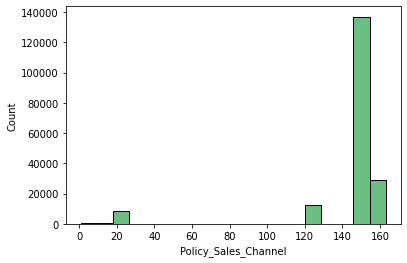

In [46]:
#main channel age under 36
sns.histplot(df_y.Policy_Sales_Channel)

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Count'>

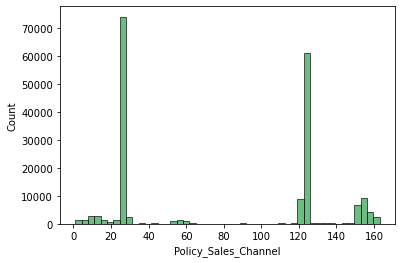

In [15]:
#main channel age 36 over
sns.histplot(df_o.Policy_Sales_Channel)

### 9. Age_group
- While we make new variables we think there are many differences between customer's age so we make 9th variable which we call Age_group

<AxesSubplot:xlabel='Age_group', ylabel='Count'>

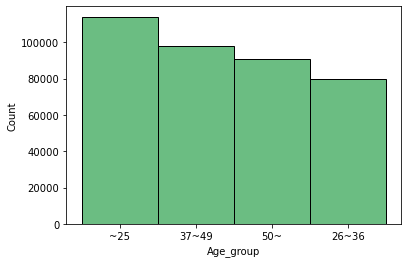

In [33]:
sns.histplot(var_df['Age_group'])

### 10. Young_Rich
- As we saw in Previously_Insured section, there were low case who has postive reponse for car insurance while they have been insurance, but when we close up for the positive case, the age were distributed centered on younger group
- So we make 10th variable which we call Young_Rich

<AxesSubplot:xlabel='Previously_Insured'>

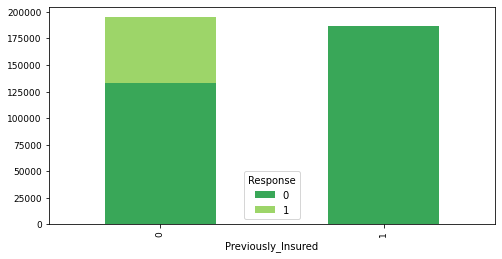

In [47]:
gb = df.groupby(['Previously_Insured', 'Response']).size().unstack()
gb.plot(kind='bar', stacked=True, figsize = [8,4], fontsize = 9)